In [21]:
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
%matplotlib inline

In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("train data shape : ", X_train.shape)
print("test data shape : ", X_test.shape)
print("train label shape : ", y_train.shape)
print("test label shape : ", y_test.shape)

train data shape :  (60000, 28, 28)
test data shape :  (10000, 28, 28)
train label shape :  (60000,)
test label shape :  (10000,)


Number :  1


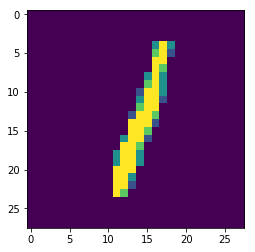

In [23]:
import matplotlib.pyplot as plt
import numpy as np
idx = np.random.randint(0, 60000)
print("Number : ", y_train[idx])
plt.imshow(X_train[idx])

In [24]:
X_train = X_train.reshape(60000, 784)
X_train = X_train.astype('float32')
X_test = X_test.reshape(10000, 784)
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
classes = 10
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)

In [33]:
#setting up parameter
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 20
epochs = 2

In [34]:
###4.Build the model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_23 (Dense)             (None, 20)                8020      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train, y_train, batch_size=batch_size, epochs = 10, verbose=2)

Epoch 1/10
 - 1s - loss: 1.5538 - accuracy: 0.5708
Epoch 2/10
 - 1s - loss: 0.6761 - accuracy: 0.8367
Epoch 3/10
 - 1s - loss: 0.4806 - accuracy: 0.8747
Epoch 4/10
 - 1s - loss: 0.4045 - accuracy: 0.8913
Epoch 5/10
 - 2s - loss: 0.3629 - accuracy: 0.9000
Epoch 6/10
 - 2s - loss: 0.3358 - accuracy: 0.9065
Epoch 7/10
 - 2s - loss: 0.3159 - accuracy: 0.9116
Epoch 8/10
 - 2s - loss: 0.3003 - accuracy: 0.9158
Epoch 9/10
 - 2s - loss: 0.2872 - accuracy: 0.9193
Epoch 10/10
 - 2s - loss: 0.2758 - accuracy: 0.9222


In [32]:
model.evaluate(X_test, y_test, verbose=1)

10000/10000 [==============================] - 0s 40us/step


[0.39722389084100723, 0.8962000012397766]